In [1]:
import sklearn as sl
import numpy as np
import pandas as pd
sl.__version__


'0.19.1'

In [2]:
from pandas import read_csv

arquivo = '/home/lperozin/Documents/DSA/real_time_analytics/05 Machine_Learning_Python/data/mammographic_masses.data'
colunas = ['BIRADS','Age','Shape','Margin','Density','Severity']
dados = read_csv(arquivo, names = colunas, na_filter = True)
print(dados.shape)

(961, 6)


In [3]:

dados.head(10)

,BIRADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


In [4]:
dados.dtypes

BIRADS      float64
Age         float64
Shape       float64
Margin      float64
Density     float64
Severity      int64
dtype: object

In [5]:
dados.describe()

,BIRADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [ ]:
# marcando os valores zero ou missing como NaN
#dados = dados.replace('?', np.NaN)

In [6]:
# eliminando as observações com NaN
dados.dropna(inplace=True)

In [7]:

# Verificando a distribuição das classes
dados.groupby('Severity').size()

Severity
0    427
1    403
dtype: int64

In [8]:
dados.shape

(830, 6)

In [9]:
##Visulização dos Dados
import matplotlib.pyplot as plt
%matplotlib inline

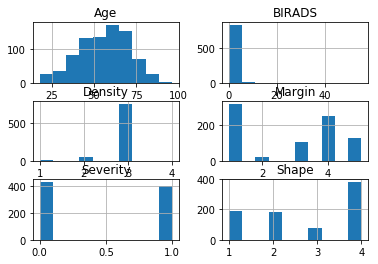

In [10]:
dados.hist()
plt.show()

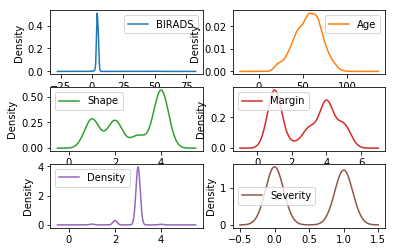

In [11]:
dados.plot(kind='density', subplots = True, layout = (3,2), sharex = False, sharey = False)
plt.show()

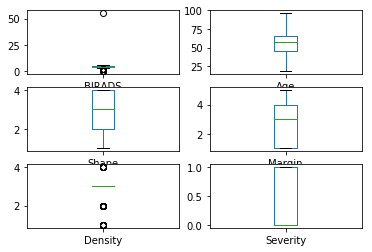

In [12]:
dados.plot(kind='box', subplots = True, layout = (3,2), sharex = False, sharey = False)
plt.show()

In [13]:
#verificando a correlação
correl=dados.corr()
correl

,BIRADS,Age,Shape,Margin,Density,Severity
BIRADS,1.000000,0.094623,0.180120,0.157771,0.028356,0.223826
Age,0.094623,1.000000,0.380096,0.420913,0.052417,0.455216
Shape,0.180120,0.380096,1.000000,0.738014,0.073969,0.564763
Margin,0.157771,0.420913,0.738014,1.000000,0.124860,0.574498
Density,0.028356,0.052417,0.073969,0.124860,1.000000,0.068651
Severity,0.223826,0.455216,0.564763,0.574498,0.068651,1.000000


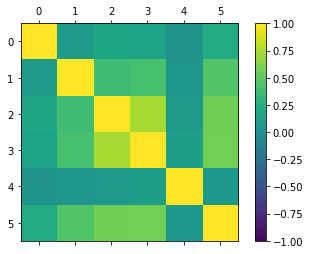

In [14]:
fig=plt.figure()
ax= fig.add_subplot(111)
cax=ax.matshow(correl, vmin=-1,vmax=1)
fig.colorbar(cax)
plt.show()

# Prepando os dados para Machine learning

Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrões em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1. Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. Funciona bem quando os dados já estão na mesma escala. O scikit-learn possui uma função para esta etapa, chamada StandardScaler().

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
array=dados.values
X = array[:,0:5]
Y = array[:,5]

scaler=StandardScaler().fit(X)
standardX=scaler.transform(X)

print(standardX[0:5,:])

[[ 0.3211177   0.7650629   0.17563638  1.39618483  0.24046607]
 [ 0.3211177   0.15127063  0.98104077  1.39618483  0.24046607]
 [-0.20875843 -1.89470363 -1.43517241 -1.157718    0.24046607]
 [ 0.3211177   0.08307148 -1.43517241  1.39618483  0.24046607]
 [ 0.3211177   1.37885518 -1.43517241  0.75770912  0.24046607]]


# Feature Selection

Os atributos presentes no seu dataset e que você utiliza nos dados de treino, terão grande influência na precisão e resultado do seu modelo preditivo. Atributos irrelevante terão impacto negativo na performance, enquanto atributos colineares podem afetar o grau de acurácia do modelo. O Scikit-learn possui funções que automatizam o trabalhao de extração e seleção de variáveis.

A etapa de Feature Selection é onde selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras. O Feature Selection nos ajuda a reduzir o overfitting (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.

### Seleção Univariada

Aqui analisáremos as variáveis mais importantes "Melhores" para nosso modelo de classificação. Será usada a técnica do chi quadrado "Chi2"

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Extração de Variáveis
test=SelectKBest(score_func = chi2, k=3)
fit=test.fit(X,Y)


print(fit.scores_)


# Sumarizando atributos selecionados
features = fit.transform(X)
print(features[0:5,:])



[  3.37049025e+01   6.62919668e+02   1.46702126e+02   2.38867486e+02
   1.65029192e-01]
[[ 67.   3.   5.]
 [ 58.   4.   5.]
 [ 28.   1.   1.]
 [ 57.   1.   5.]
 [ 76.   1.   4.]]


## Separando as variaveis selecionadas

In [18]:
new_X = array[:,1:4]
new_X

array([[ 67.,   3.,   5.],
       [ 58.,   4.,   5.],
       [ 28.,   1.,   1.],
       ..., 
       [ 64.,   4.,   5.],
       [ 66.,   4.,   5.],
       [ 62.,   3.,   3.]])

# Aplicando classificação através de regressão logística com as variáveis selecionadas

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(new_X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criação do modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Score
resultado = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (resultado * 100.0))]

Acurácia: 78.102%


## Aplicando classificação através de regressão logística com todas as variáveis

In [20]:
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = teste_size, 
                                                                         random_state = seed)

# Criação do modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Score
resultado = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))

Acurácia: 80.657%


## Aplicando classificação Naive bayes com variáveis selecionadas

In [71]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 8
num_instances = len(new_X)
seed = 7

#help(model_selection.KFold)

#separando os dados em folds
kfold=model_selection.KFold(num_folds, True, random_state = seed)

#criando o modelo
# Criando o modelo
modelo = GaussianNB()
resultado = model_selection.cross_val_score(modelo, new_X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f%%" % (resultado.mean()*100.0))


Acurácia: 79.518%


## Aplicando classificação Naive bayes com todas as variáveis

In [100]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB

# Definindo os valores para o número de folds
num_folds = 6
num_instances = len(X)
seed = 7

#help(model_selection.KFold)

#separando os dados em folds
kfold=model_selection.KFold(num_folds, True, random_state = seed)

#criando o modelo
# Criando o modelo
modelo_nb = GaussianNB()
resultado = model_selection.cross_val_score(modelo_nb, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f%%" % (resultado.mean()*100.0))

Acurácia: 81.330%


## Aplicando AdaBoost
Algoritmos baseados em Boosting Ensemble criam uma sequência de modelos que tentam corrigir os erros dos modelos 
anteriores dentro da sequência. Uma vez criados, os modelos fazem previsões que podem receber um peso de acordo 
com sua acurácia e os resultados são combinados para criar uma previsão única final. 

In [103]:
from sklearn.ensemble import AdaBoostClassifier

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Definindo o número de trees
num_trees = 30

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo_ada = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
resultado = model_selection.cross_val_score(modelo_ada, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f%%" % (resultado.mean()*100.0))

Acurácia: 83.133%


## Confusion Matrix

In [104]:
from sklearn import metrics
y_true = Y_teste
y_pred = modelo_ada.fit(X_treino, Y_treino).predict(X_teste)


# Criando uma Confusion Matrix
print("Confusion Matrix")
print("")
print("{0}".format(metrics.confusion_matrix(y_true, y_pred, labels = [1,0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_true, y_pred, labels = [1, 0]))


Confusion Matrix

[[ 94  37]
 [ 17 126]]

Classification Report
             precision    recall  f1-score   support

          1       0.85      0.72      0.78       131
          0       0.77      0.88      0.82       143

avg / total       0.81      0.80      0.80       274

